In [1]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

/mnt/sda1/dados/github/projetos/alunos/Edson/EIT_2D/exemplos/biblioteca_Edson/inverseProblem.py:280: SyntaxWarning: invalid escape sequence '\D'
  label='Norma $\Delta\sigma$')        # plota gráfico das iterações,
/mnt/sda1/dados/github/projetos/alunos/Edson/EIT_2D/exemplos/biblioteca_Edson/inverseProblem.py:308: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(centros, valores , marker='None', label='$\sigma$ calculado')
/mnt/sda1/dados/github/projetos/alunos/Edson/EIT_2D/exemplos/biblioteca_Edson/inverseProblem.py:309: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(centros, valores_real, marker='None', linestyle=':', label='$\sigma$ real' )
/mnt/sda1/dados/github/projetos/alunos/Edson/EIT_2D/exemplos/biblioteca_Edson/inverseProblem.py:314: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('Condutividade $\sigma$')
/mnt/sda1/dados/github/projetos/alunos/Edson/EIT_2D/exemplos/biblioteca_Edson/inverseProblem.py:315: SyntaxWarning: invalid escape sequence '\s'
  plt

# EXEMPLOS BIBLIOTECA EDSON

ToDo:

- Implementar elemento 1D ( class LinearLineEdson() ) [elements.py]
- Implementar malha 1D ( class PointElectrodes1DMeshEdson() ) [mesh.py]
- Rodar exemplos 1D antigos e ver se bate
- Implementar problema direto (que deve funcionar com qualquer malha, não interessa se é 1D, 2D, com ou sem eletrodo...) [forward.py]

## Teste Tarefa unidimensional 
(class PointElectrodes1DMeshEdson()).

NumberOfElectrodes: 11
Reading ../../malhasMSH/unidimensional_100T_dif_py.msh.

msh_physical_groups found (type line): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2].
Physical tags found (type line): [1 2].
MSH file with 100 elements and 101 nodes.
GndNode: 0
first five coordinates: [[0.    0.    0.   ]
 [0.01  0.    0.   ]
 [0.015 0.    0.   ]
 [0.02  0.    0.   ]
 [0.025 0.    0.   ]]
Altura1D: 0.001
Vetor de corrente: 
 [-0.001  0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.    

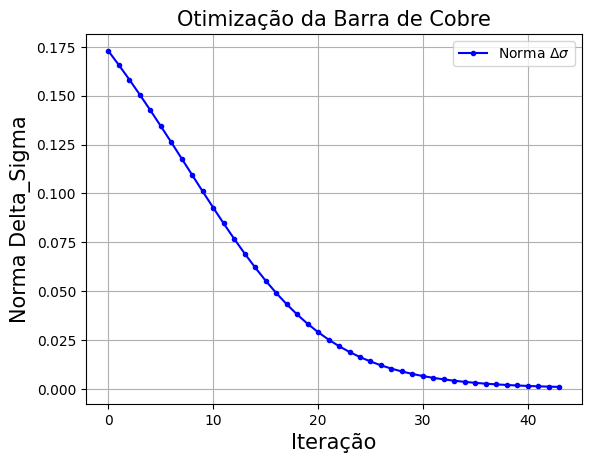

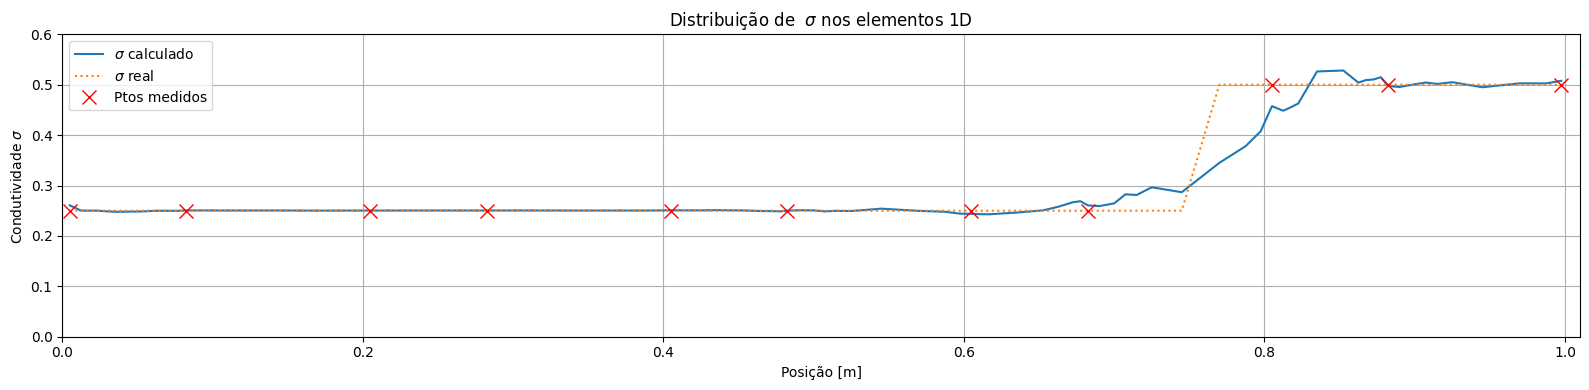

In [2]:
nome = '../../malhasMSH/unidimensional_100T_dif_py.msh'
#nome = '../../malhasMSH/unidimensional_4e_py.msh'

noh_eletrodos = [0,  10, 20, 30, 40, 50, 60, 70, 80, 90,  100]
#noh_eletrodos = [0,  1, 2, 3, 4]

MinhaMalha1D = mesh.PointElectrodes1DMeshEdson(noh_eletrodos, nome_msh=nome, altura2D = 0.001)
MinhaMalha1D.ReadMesh()


meus_sigmas = {}
meus_sigmas[1] = 0.25
meus_sigmas[2] = 0.5
MinhaMalha1D.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

sigma_inicial = np.full(MinhaMalha1D.NumberOfElements, 0.50)          # Monta vetor sigma inicia

amplitude_corrente = 0.001
Pcorrente = np.zeros(MinhaMalha1D.NumberOfNodes)                    # Monta vetor de corrente
Pcorrente[0] = -amplitude_corrente                            # Nó de saída de corrente
Pcorrente[MinhaMalha1D.NumberOfElements] = amplitude_corrente                  # Nó de entrada de corrente    

fwd = forwardProblem.forward_problem(MinhaMalha1D, Pcorrente=Pcorrente)   # __init__ roda aqui

fwd.Solve()

#plt.plot(fwd.Vmedido)
print(f'Vmedido \n {fwd.Vmedido.shape}')
nome_arquivo = 'unidimensional_100e_py'

N_padraoCC = 1

##fwd.criar_arquivo_pos_2D(N_padraoCC, fwd.Vmedido, nome_arquivo)
#fwd.criar_arquivo_pos_2D(fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)


V_measured = fwd.Vmedido_eletrodos
invProblem = inverseProblem.inverse_problem(MinhaMalha1D, Pcorrente=Pcorrente, debug=1)
invProblem.solve(sigma_inicial, V_measured)
#print('Y_jacobian',invProblem.Y_jacobian)

In [3]:
invProblem.Y_Vcalc

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.07611292, -0.05004744, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.05004744,  0.10008952, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.05865289,
        -0.03351493,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.03351493,
         0.13507179, -0.10155686],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.10155686,  0.10155686]], shape=(101, 101))

## Testes com HUA

In [4]:
#nome = '../../malhasMSH/circ2_tst_Hua_v2_2_lc_especial.msh'
nome = '../../malhasMSH/circ8_anom4_tst_Hua_v4_1_lc_0_01.msh'

MinhaMalha = mesh.HuaElectrodes2DMeshEdson(8, nome_msh=nome, altura2D = 0.02)
MinhaMalha.ReadMesh() 

print(MinhaMalha.Elements[2])
print(f"Centroid: {MinhaMalha.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalha.Elements[2].KGeo}")


meus_sigmas = {
1000 : 0.1,    
1001 : 0.01,
5001 : 0.2, 
5002 : 0.2, 
5003 : 0.2, 
5004 : 0.2, 
5005 : 0.2, 
5006 : 0.2, 
5007 : 0.2, 
5008 : 0.2,  
}

MinhaMalha.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

#MinhaMalha.CalcKGlobal() # calculando KGlobal usando Sigmas

#coordenadas = MinhaMalha.Coordinates
#topologia = MinhaMalha.msh_topology

#MinhaMalha.KGlobal

#KGlobal =  MinhaMalha.KGlobal


print(f'n_nodes = {MinhaMalha.NumberOfNodes}')


fwd = forwardProblem.forward_problem(MinhaMalha, Pcorrente=None, SkipPattern=0, VirtualNode = True)   # __init__ roda aqui


print(f'Pcorrente \n {fwd.corrente[MinhaMalha.NumberOfNodes-MinhaMalha.NumberOfElectrodes: MinhaMalha.NumberOfNodes]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ8_anom4_tst_Hua_v4_1_lc_0_01'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)



Reading ../../malhasMSH/circ8_anom4_tst_Hua_v4_1_lc_0_01.msh.

msh_physical_groups found (type triangle): [1000 1000 1000 ... 1001 1001 1001].
Physical tags found (type triangle): [1000 1001].
Physical tags: lines: [5001 5002 5003 5004 5005 5006 5007 5008]; points: [10000]
8 electrodes found.
MSH file with 1930 elements and 1030 nodes.
ElectrodeNodes: [1030 1031 1032 1033 1034 1035 1036 1037]
1962 Elements and 1038 Nodes found on model.
GndNode: 40
Centroid: [-0.01557736 -0.13111227  0.        ]
KGeo: 
[[ 0.00854522 -0.00547768 -0.00306753]
 [-0.00547768  0.01521378 -0.00973609]
 [-0.00306753 -0.00973609  0.01280363]]
n_nodes = 1038
Pcorrente 
 [[ 0.001  0.     0.     0.     0.     0.     0.    -0.001]
 [-0.001  0.001  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.001  0.001  0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.001  0.001  0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.001  0.001  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.001  0.001  0.     

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


-------------------------------------------------------
Version       : 4.14.0
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20250703
Build host    : gmsh.info
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen[contrib] Fltk Gmm[contrib] Hxt Jpeg Kbipack Lapack[petsc] LinuxJoystick MathEx[contrib] Med Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom PETSc Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib tinyobjloader
FLTK version  : 1.3.11
PETSc version : 3.14.4 (real arithmtic)
OCC version   : 7.8.1
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


# TESTE COM eletrodo pontual

In [5]:
nome = '../../malhasMSH/circ16_anomalia6.msh'

MinhaMalhaPto = mesh.PointElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto.ReadMesh() 

print(MinhaMalhaPto.Elements[2])
print(f"Centroid: {MinhaMalhaPto.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalhaPto.Elements[2].KGeo}")

meus_sigmas = {
1000 : 0.1,    
1001 : 0.01,
10001 : 0.2,
10002 : 0.2, 
10003 : 0.2, 
10004 : 0.2, 
10005 : 0.2, 
10006 : 0.2, 
10007 : 0.2, 
10008 : 0.2, 
10008 : 0.2, 
10010 : 0.2, 
10011 : 0.2, 
10012 : 0.2, 
10013 : 0.2, 
10014 : 0.2, 
10015 : 0.2, 
10016 : 0.2,  
}

MinhaMalhaPto.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto.CalcKGlobal() # calculando KGlobal usando Sigmas


print(f'MinhaMalhaPto.KGlobal =  {MinhaMalhaPto.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto, Pcorrente=None, SkipPattern=3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
print(f'Pcorrente \n {fwd.corrente[:16]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ16_anomalia6'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

Reading ../../malhasMSH/circ16_anomalia6.msh.

msh_physical_groups found (type triangle): [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 10

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


# TESTE COM eletrodo pontual mesh 4 elementos

## Regularização Filtro Gaussiano FP_Alta

fonte: Erick equação C.37

$$
\hat{\theta}_{k+1} = \hat{\theta}_k + \alpha_k
\left( J_k^T W_1 J_k + \lambda^2 L_2^T L_2 \right)^{-1}
\cdot \left( J_k^T W_1 (z - h(\hat{\theta}_k)) - \lambda^2 L_2^T L_2 (\hat{\theta}_k - \theta^*) \right)
$$
onde,
$$W_1=L_1^T L_1$$

In [6]:
# TESTE COM eletrodo pontual mesh 4 elementos

###############################################################################
nome = '../../malhasMSH/quatro_triangulos_03nov2025.msh'

MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 1.00)
MinhaMalhaPto2.ReadMesh() 

print(MinhaMalhaPto2.Elements[2])
print(f"Centroid: {MinhaMalhaPto2.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalhaPto2.Elements[2].KGeo}")
sigma_inicial = np.full(MinhaMalhaPto2.NumberOfElements, 1.0)          # Monta vetor sigma inicial



meus_sigmas = {
1000 : 2.0,    
1001 : 2.00}

MinhaMalhaPto2.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto2.CalcKGlobal() # calculando KGlobal usando Sigmas


print(f'MinhaMalhaPto2.KGlobal =  {MinhaMalhaPto2.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto2, Pcorrente=None, SkipPattern=1)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
print(f'Pcorrente \n {fwd.corrente[:16]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'ParaVernoGmshPto'
#fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

#print(f'self.Yinversa \n {fwd.Yinversa}')

V_measured = fwd.Vmedido_eletrodos

print(f'V_mesured \n {V_measured}')


invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalhaPto2, Pcorrente=fwd.corrente)
invProblem_2D.solve(V_measured, fwd.Yinversa)
#print('Y_jacobian',invProblem.Y_jacobian)

Reading ../../malhasMSH/quatro_triangulos_03nov2025.msh.

msh_physical_groups found (type triangle): [1000 1001 1001 1000].
Physical tags found: [1000 1001].
Physical tags points: [10000 10001 10002 10003 10004]
4 electrodes found.
MSH file with 4 elements and 5 nodes.
ElectrodeNodes: [0 1 2 3]
GndNode: 4
Centroid: [0.5        0.83333333 0.        ]
KGeo: 
[[ 0.5  0.  -0.5]
 [ 0.   0.5 -0.5]
 [-0.5 -0.5  1. ]]
MinhaMalhaPto2.KGlobal =  [[ 2.  0.  0.  0. -2.]
 [ 0.  2.  0.  0. -2.]
 [ 0.  0.  2.  0. -2.]
 [ 0.  0.  0.  2. -2.]
 [-2. -2. -2. -2.  8.]]
Pcorrente 
 [[ 0.001  0.    -0.001  0.   ]
 [ 0.     0.001  0.    -0.001]
 [-0.001  0.     0.001  0.   ]
 [ 0.    -0.001  0.     0.001]
 [ 0.     0.     0.     0.   ]]
Pcorrente 
 (5, 4)
Vetor de corrente: 
 [[ 0.001  0.    -0.001  0.   ]
 [ 0.     0.001  0.    -0.001]
 [-0.001  0.     0.001  0.   ]
 [ 0.    -0.001  0.     0.001]
 [ 0.     0.     0.     0.   ]]
 Tensões medidas em todos os nós 
 [[ 0.0005  0.     -0.0005  0.    ]
 [ 0.     

/mnt/sda1/dados/github/projetos/alunos/Edson/EIT_2D/exemplos/biblioteca_Edson/inverseProblem_2D.py:251: SyntaxWarning: invalid escape sequence '\D'
  label='Norma $\Delta\sigma$')        # plota gráfico das iterações,


ValueError: operands could not be broadcast together with shapes (4,20) (4,) 